# **Load data**

In [1]:
# import json
# import os

# with open('drive/MyDrive/kaggle.json') as f:
#   kaggle_api = json.load(f)
# os.environ['KAGGLE_USERNAME'] = kaggle_api['username']
# os.environ['KAGGLE_KEY'] = kaggle_api['key']


In [2]:
# !kaggle competitions download -c playground-series-s4e2

In [3]:
# !unzip playground-series-s4e2

# **Browse data**

In [4]:
import pandas as pd

df = pd.read_csv('train.csv')
print('total data: {}'.format(df.shape[0]))
print('column numbers: {}'.format(df.shape[1]))
print(df.columns)
df.head()

total data: 20758
column numbers: 18
Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


# **Check missing data**

In [5]:
print(df.isnull().sum())

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


# **Visualization**

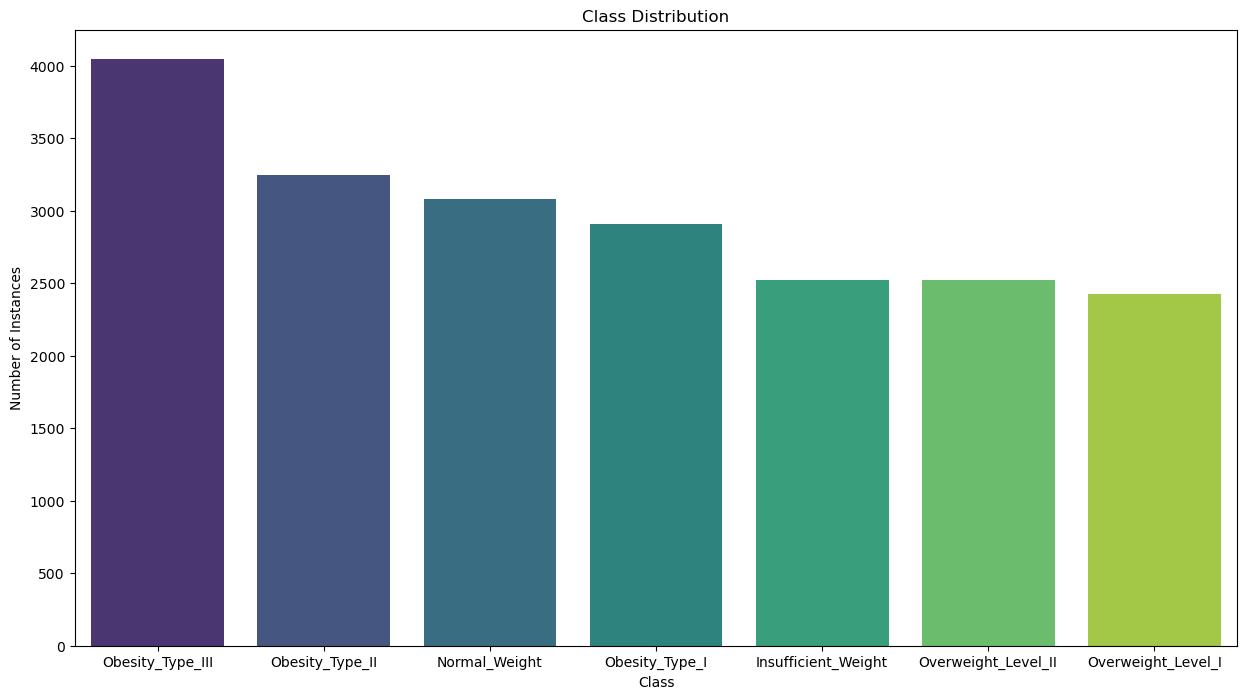

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = df['NObeyesdad'].value_counts()
plt.figure(figsize=(15, 8))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.show()

# **Numericalization**

In [7]:
from sklearn.preprocessing import LabelEncoder

class_mapping = {'Obesity_Type_III': 7, 'Obesity_Type_II': 6, 'Obesity_Type_I': 5, 'Overweight_Level_II': 4, 'Overweight_Level_I': 3, 'Normal_Weight': 2, 'Insufficient_Weight': 1}
df['NObeyesdad'] = df['NObeyesdad'].map(class_mapping)
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])
df['BMI'] = df['Weight'] / (df['Height'] ** 2)
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,4,28.259565
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,2,23.422091
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,1,17.126706
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3,7,44.855798
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3,4,25.599151


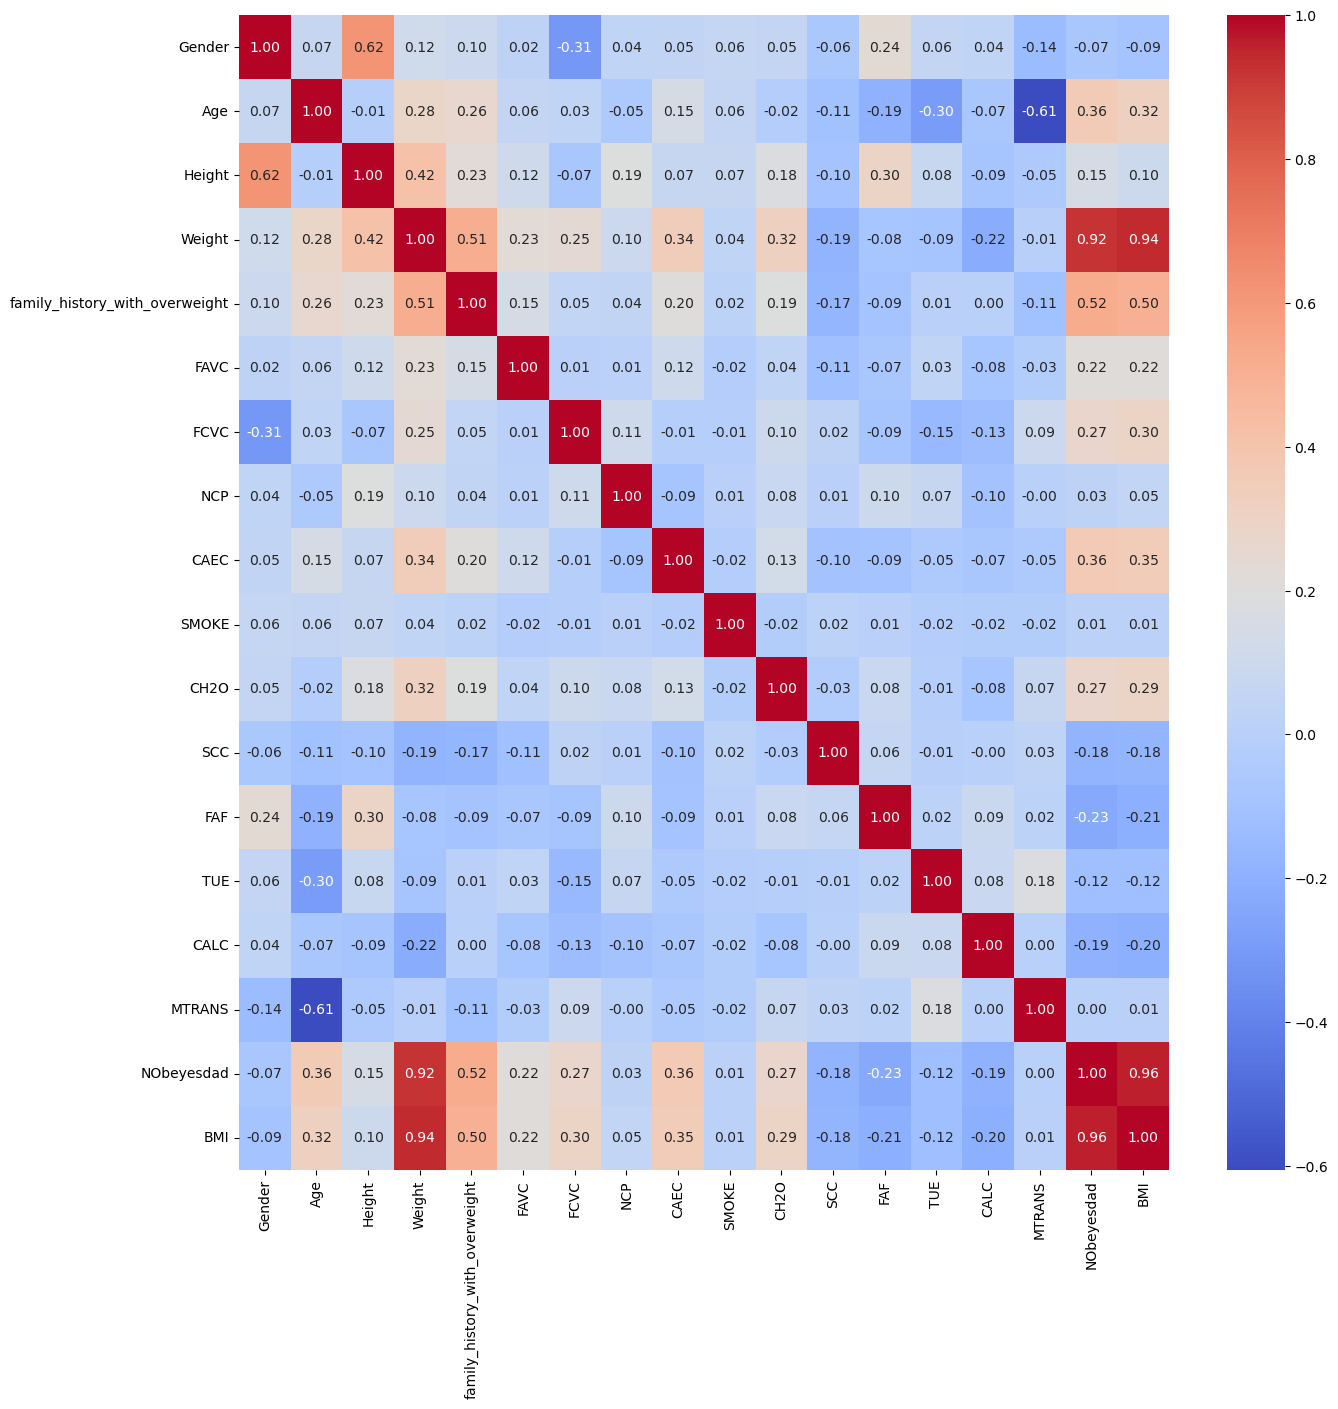

In [8]:
df = df.drop('id', axis=1)
corr_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# **Prediction**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

y = df[['NObeyesdad']]
x2 = df.drop(['NObeyesdad','SMOKE','SCC','BMI'], axis=1)
x_tr, x_val, y_tr, y_val = train_test_split(x2, y, test_size=0.2)

clf = RandomForestClassifier(random_state=36, n_estimators=10)
clf.fit(x_tr, np.ravel(y_tr))
y_pred = clf.predict(x_val)

accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8747591522157996
Confusion Matrix:
[[467  33   0   0   1   1   0]
 [ 45 514  46   8   2   0   0]
 [  2  66 330  70   9   0   0]
 [  0  15  48 389  38   0   0]
 [  1   2  19  62 511  12   2]
 [  0   0   0   8  27 646   0]
 [  0   0   0   0   3   0 775]]


In [11]:
from sklearn.tree import DecisionTreeClassifier

x3 = df[['BMI']]

x_tr, x_val, y_tr, y_val = train_test_split(x3, y, test_size=0.2)

clf = DecisionTreeClassifier()
clf.fit(x_tr, y_tr)
y_pred = clf.predict(x_val)

accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.7680635838150289
Confusion Matrix:
[[424  47   3   0   0   0   0]
 [ 48 529  31   5   2   0   0]
 [  6  79 276  89  22   0   0]
 [  3  10 102 339  70  13   0]
 [  4   1  22  62 402  69  14]
 [  0   0   1   9  69 511  75]
 [  1   0   3   0  13  90 708]]
